In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import export_graphviz
import seaborn as sns
import pydot
from datetime import date, datetime
from sklearn.metrics import mean_squared_error
from sklearn import datasets, ensemble

# 

# Data Preprocessing 

In [2]:
df_test= pd.read_csv('test.csv',index_col='Id')
df_train= pd.read_csv('train.csv',index_col='Id')

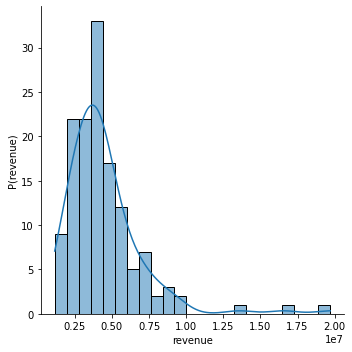

In [3]:
sns.displot(data=df_train['revenue'], kde=True).set(xlabel='revenue', ylabel='P(revenue)')

The last three values are outliners, so they will have to be removed.
They are all greater than 12500000

In [4]:
df_train=df_train[df_train['revenue']<12500000]
df_train.reset_index(drop=True)

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,...,3.0,0,0,0,0,0,0,0,0,5787594.0
130,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,...,3.0,0,0,0,0,0,0,0,0,9262754.0
131,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,...,3.0,0,0,0,0,0,0,0,0,2544857.0
132,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


Open Dates can be converted to age of the restaurant and can be used.

In [5]:
def cal_age(od):
    od=datetime.strptime(od,"%m/%d/%Y").date()
    today=date.today()
    return today.year-od.year-((today.month, today.day) < (od.month, od.day))

In [6]:
df_train['Age']=df_train['Open Date'].apply(cal_age)
df_train=df_train.drop('Open Date',axis=1).drop('City',axis=1)

In [7]:
df_test['Age']=df_test['Open Date'].apply(cal_age)
df_test=df_test.drop('Open Date',axis=1).drop('City',axis=1)

In [8]:
df_train=pd.get_dummies(df_train)
df_test=pd.get_dummies(df_test).drop('Type_MB',axis=1)

In [9]:
revenue=df_train['revenue']
df_train=df_train.drop('revenue',axis=1)

In [10]:
cols=np.array(df_train.columns)

In [11]:
df_train.shape,df_test.shape

((134, 43), (100000, 43))

# 

# Random Forest Regression

In [12]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(df_train,revenue)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [13]:
predictions_rf = rf.predict(df_test)
pd.DataFrame(predictions_rf).to_csv('Random_forest_prediction.csv')

### Mean Square Error 

In [14]:
mse_rf=mean_squared_error(revenue,rf.predict(df_train))
print(mse_rf)

386436918829.40216


### Decision tree graph 

In [15]:
tree = rf.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = cols, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')


In [16]:
graph.write_png('tree.png')

In [17]:
rf.feature_importances_

array([3.47495823e-02, 4.50186383e-02, 2.79021741e-02, 2.36256425e-02,
       3.34383341e-02, 3.87095235e-02, 3.59832485e-03, 1.96050873e-02,
       8.42805493e-03, 8.73263049e-03, 4.10899895e-02, 1.28843105e-02,
       8.63550100e-03, 8.96261639e-03, 5.28532612e-03, 8.02070575e-03,
       2.58352175e-02, 6.06349474e-03, 3.14505586e-02, 6.83229774e-02,
       2.85522873e-02, 3.77411792e-02, 3.76106910e-02, 5.43715289e-03,
       1.81824334e-02, 8.18097908e-03, 8.34847169e-03, 1.11296943e-01,
       5.92384875e-02, 5.77076111e-03, 9.28412094e-03, 7.64934769e-03,
       3.61346341e-03, 4.66907221e-03, 3.36078143e-03, 6.50931819e-03,
       7.88223659e-03, 1.39290396e-01, 1.07138457e-02, 9.49475916e-03,
       5.56412722e-05, 1.02773566e-02, 6.48158475e-03])

In [18]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(cols, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Column: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Column: Age                  Importance: 0.14
Column: P28                  Importance: 0.11
Column: P20                  Importance: 0.07
Column: P29                  Importance: 0.06
Column: P2                   Importance: 0.05
Column: P6                   Importance: 0.04
Column: P11                  Importance: 0.04
Column: P22                  Importance: 0.04
Column: P23                  Importance: 0.04
Column: P1                   Importance: 0.03
Column: P3                   Importance: 0.03
Column: P5                   Importance: 0.03
Column: P17                  Importance: 0.03
Column: P19                  Importance: 0.03
Column: P21                  Importance: 0.03
Column: P4                   Importance: 0.02
Column: P8                   Importance: 0.02
Column: P25                  Importance: 0.02
Column: P9                   Importance: 0.01
Column: P10                  Importance: 0.01
Column: P12                  Importance: 0.01
Column: P13                  Impor

# 

# Multiple Linear Regression

In [19]:
lr = LinearRegression()

In [20]:
lr.fit(df_train,revenue)

LinearRegression()

In [21]:
predictions_mlr = lr.predict(df_test)
pd.DataFrame(predictions_mlr).to_csv('Multiple_linear_prediction.csv')

In [22]:
mse_mlr=mean_squared_error(revenue,lr.predict(df_train))
print(mse_mlr)

1995935143389.127


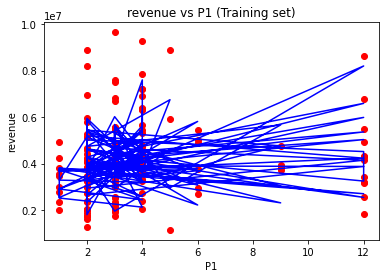

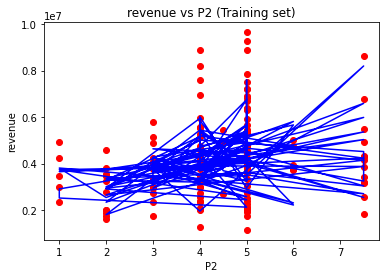

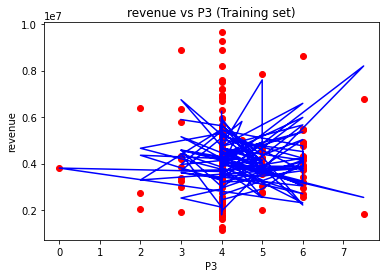

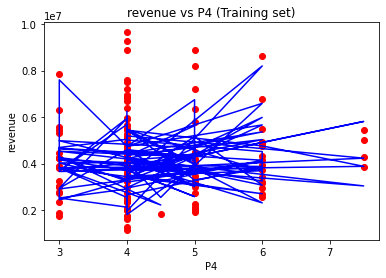

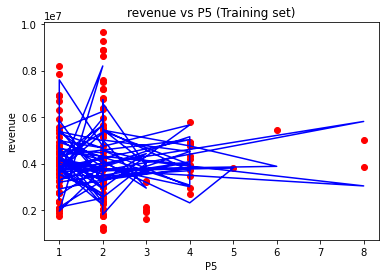

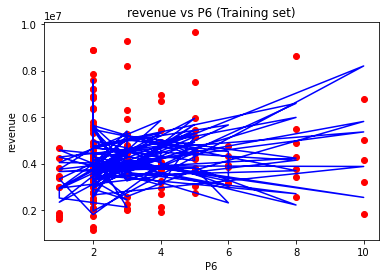

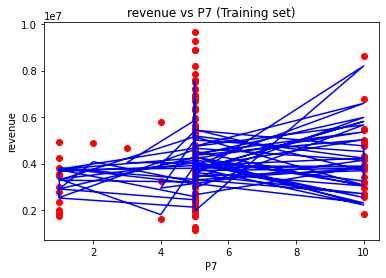

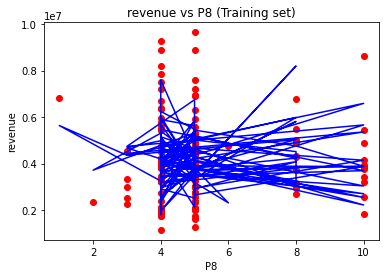

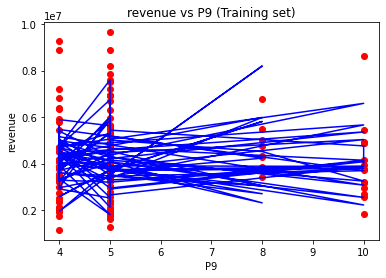

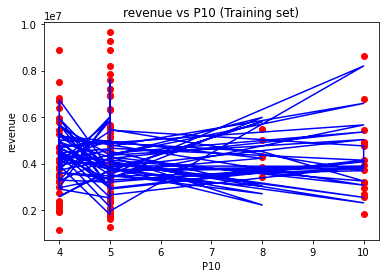

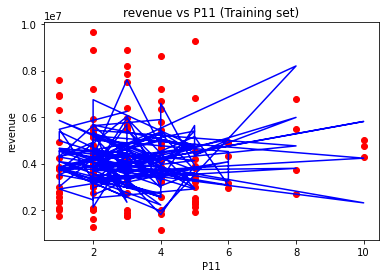

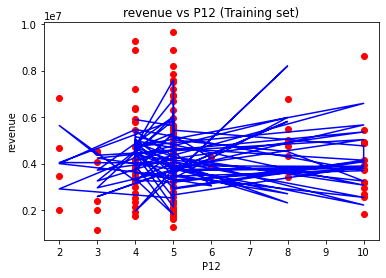

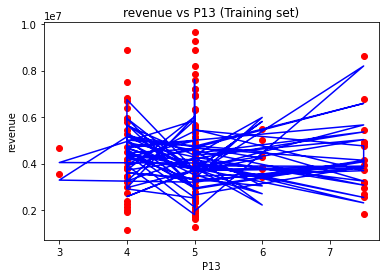

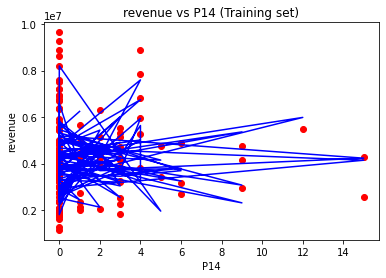

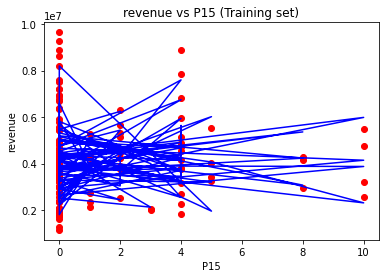

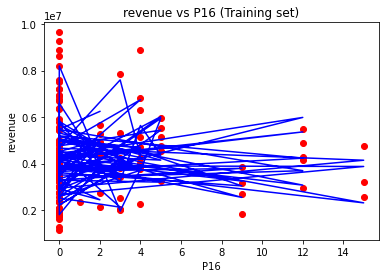

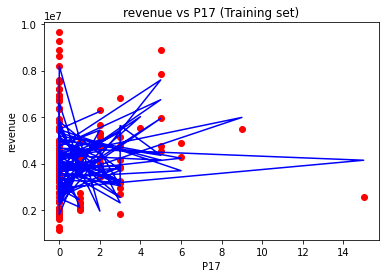

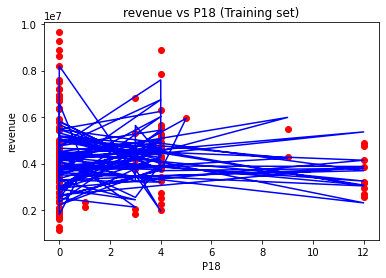

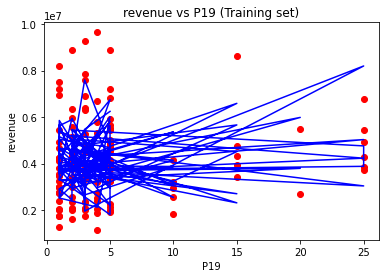

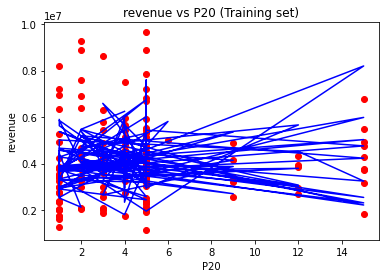

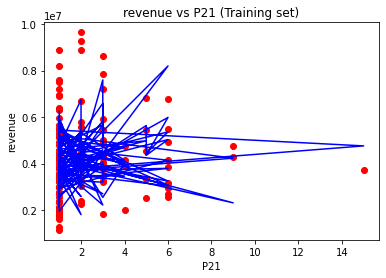

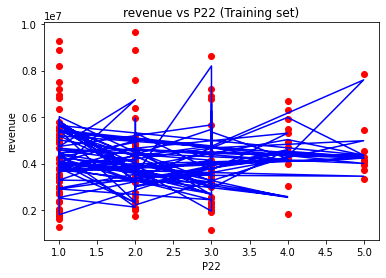

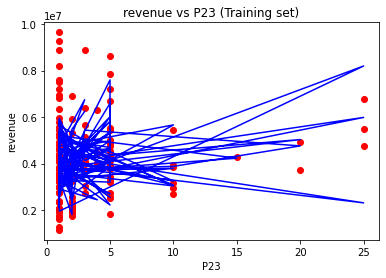

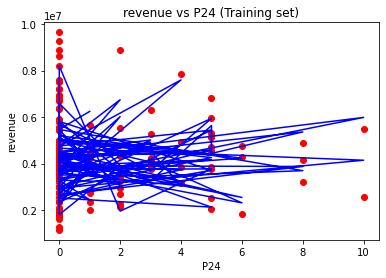

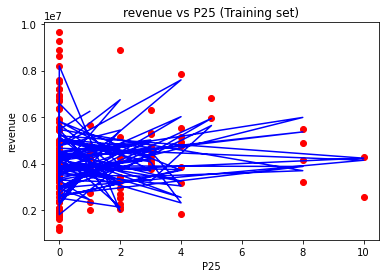

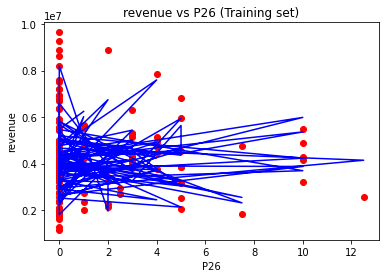

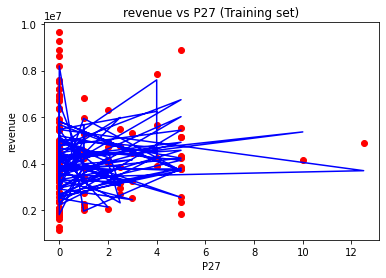

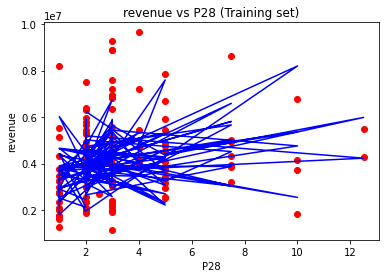

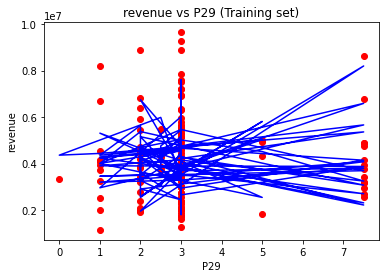

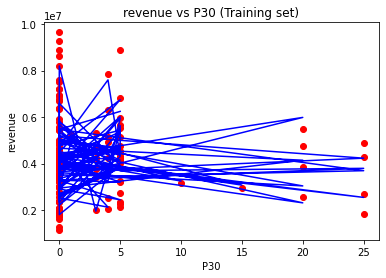

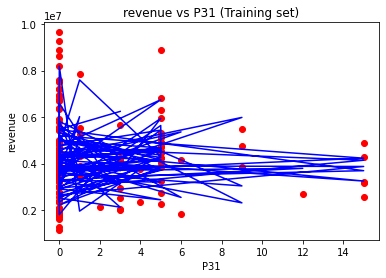

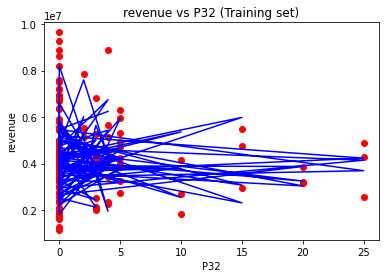

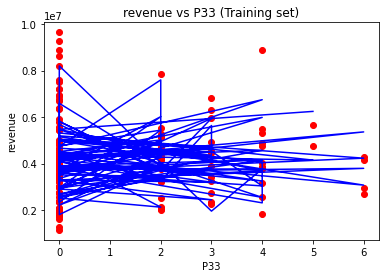

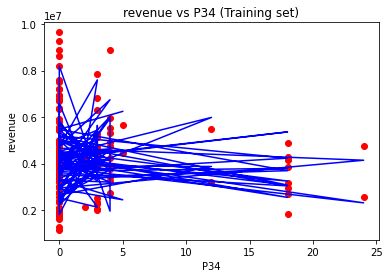

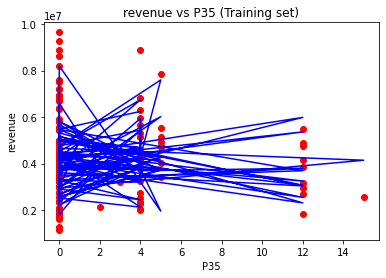

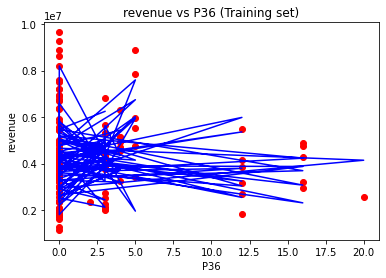

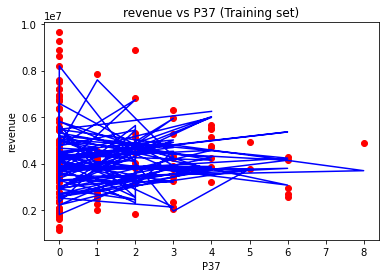

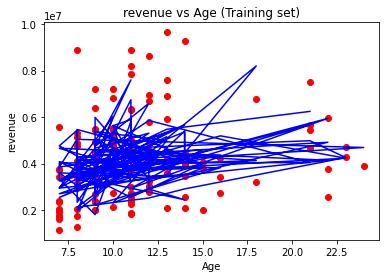

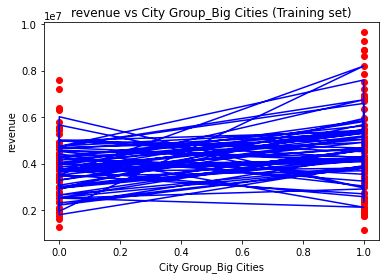

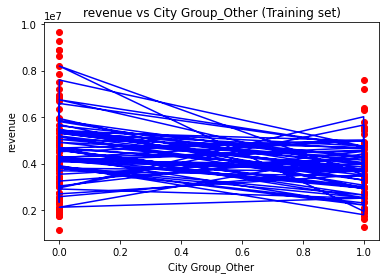

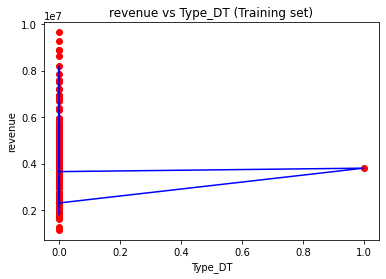

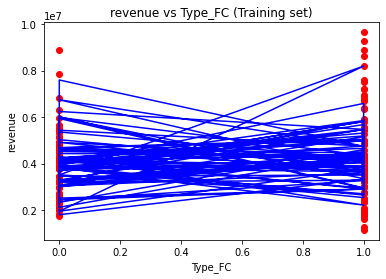

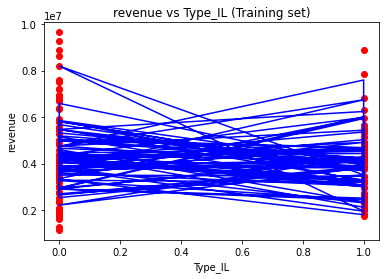

In [23]:
for x in cols:
    plt.scatter(df_train[x], revenue, color = 'red')
    plt.plot(df_train[x], lr.predict(df_train), color = 'blue')
    plt.title('revenue vs '+x+' (Training set)')
    plt.xlabel(x)
    plt.ylabel('revenue')
    plt.show()

# 

# Polynomial Regression

In [24]:
pr = PolynomialFeatures(degree = 4)

In [25]:
train_poly = pr.fit_transform(df_train)
train_poly.shape, df_train.shape

((134, 178365), (134, 43))

In [26]:
lr.fit(train_poly,revenue)

LinearRegression()

In [27]:
prediction_pr=lr.predict(pr.fit_transform(df_test.head(5)))# Cannot do for the whole set, as the it takes 133GB of memory
pd.DataFrame(prediction_pr).to_csv('Polynimial_predictions.csv')

In [28]:
mse_pr=mean_squared_error(revenue,lr.predict(train_poly))
print(mse_pr)

5.584720179829557e-13


# 

# Decision Tree Regression

In [29]:
dtr = DecisionTreeRegressor(random_state = 0)
dtr.fit(df_train,revenue)

DecisionTreeRegressor(random_state=0)

In [30]:
predictions_dtr=dtr.predict(df_test)
pd.DataFrame(predictions_dtr).to_csv('Decision_Tree_predictions.csv')

In [31]:
mse_dtr=mean_squared_error(revenue,dtr.predict(df_train))
print(mse_dtr)

0.0


# 


# Gradient Boosting Regression

In [32]:
gbr= ensemble.GradientBoostingRegressor(n_estimators=1000)

In [33]:
gbr.fit(df_train,revenue)

GradientBoostingRegressor(n_estimators=1000)

In [34]:
predictions_gbr=gbr.predict(df_test)
pd.DataFrame(predictions_gbr).to_csv('Gradient_Boosting_predictions.csv')

In [35]:
mse_gbr=mean_squared_error(revenue,gbr.predict(df_train))
print(mse_gbr)

78880078.34237923
